In [ ]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

In [ ]:
raw_df = pd.read_csv('newyork.csv')
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 37012 Airbnb listings


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210204180331,2021-02-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a few hours,93%,26%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75362,-73.98377,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Refrigerator"", ""Air conditioning"", ""Baking s...",$100.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,30,60,90,365,2021-02-05,48,0,0,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,f,2,2,0,0,0.35
1,3831,https://www.airbnb.com/rooms/3831,20210204180331,2021-02-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a few hours,98%,93%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""High...",$73.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,6,27,55,249,2021-02-05,386,80,3,2014-09-30,2021-01-27,90.0,10.0,9.0,9.0,10.0,10.0,10.0,NaN,f,1,1,0,0,4.99
2,5121,https://www.airbnb.com/rooms/5121,20210204180331,2021-02-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Private room in apartment,Private room,2,NaN,NaN,1.0,1.0,"[""Wifi"", ""Heating"", ""Air conditioning"", ""Long ...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,2021-02-0

In [ ]:
# Dropping initial columns
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
df = raw_df.drop(cols_to_drop, axis=1)

df.drop(['host_acceptance_rate', 'neighbourhood_group_cleansed', 'license'], axis=1, inplace=True)
df.set_index('id', inplace=True) # The id will be used as the index, as this could be useful in future e.g. if a separate dataset containing reviews for each property is linked to this one
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

# Several columns only contain one category and can be dropped:
df.drop(['has_availability', 'host_has_profile_pic', 'bathrooms'], axis=1, inplace=True)

# Drop somemore useless shit - Only one will be retained - for 90 days
df.drop('calendar_updated', axis=1, inplace=True)
df.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

# These will be highly correlated with number_of_reviews and so will be dropped.
df.drop(['number_of_reviews_ltm', 'number_of_reviews_l30d', 'reviews_per_month'], axis=1, inplace=True)

# Let's ignore the effects of neighbourhood first, so let's drop those columns for now
df.drop(['neighbourhood', 'neighbourhood_cleansed'], axis=1, inplace=True)

# Drop some other bullshits
df.drop(['bathrooms_text'], axis=1, inplace=True)

df.head(3)

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2595,2008-09-09,within a few hours,93%,f,6.0,t,40.75362,-73.98377,Entire apartment,Entire home/apt,2,NaN,1.0,"[""Refrigerator"", ""Air conditioning"", ""Baking s...",$100.00,30,1125,90,48,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f
3831,2008-12-07,within a few hours,98%,f,1.0,t,40.68514,-73.95976,Entire guest suite,Entire home/apt,3,1.0,3.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""High...",$73.00,1,730,55,386,2014-09-30,2021-01-27,90.0,10.0,9.0,9.0,10.0,10.0,10.0,f
5121,2009-02-03,NaN,NaN,f,1.0,t,40.68688,-73.95596,Private room in apartment,Private room,2,1.0,1.0,"[""Wifi"", ""Heating"", ""Air conditioning"", ""Long ...",$60.00,30,730,90,50,2009-05-28,2019-12-02,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f


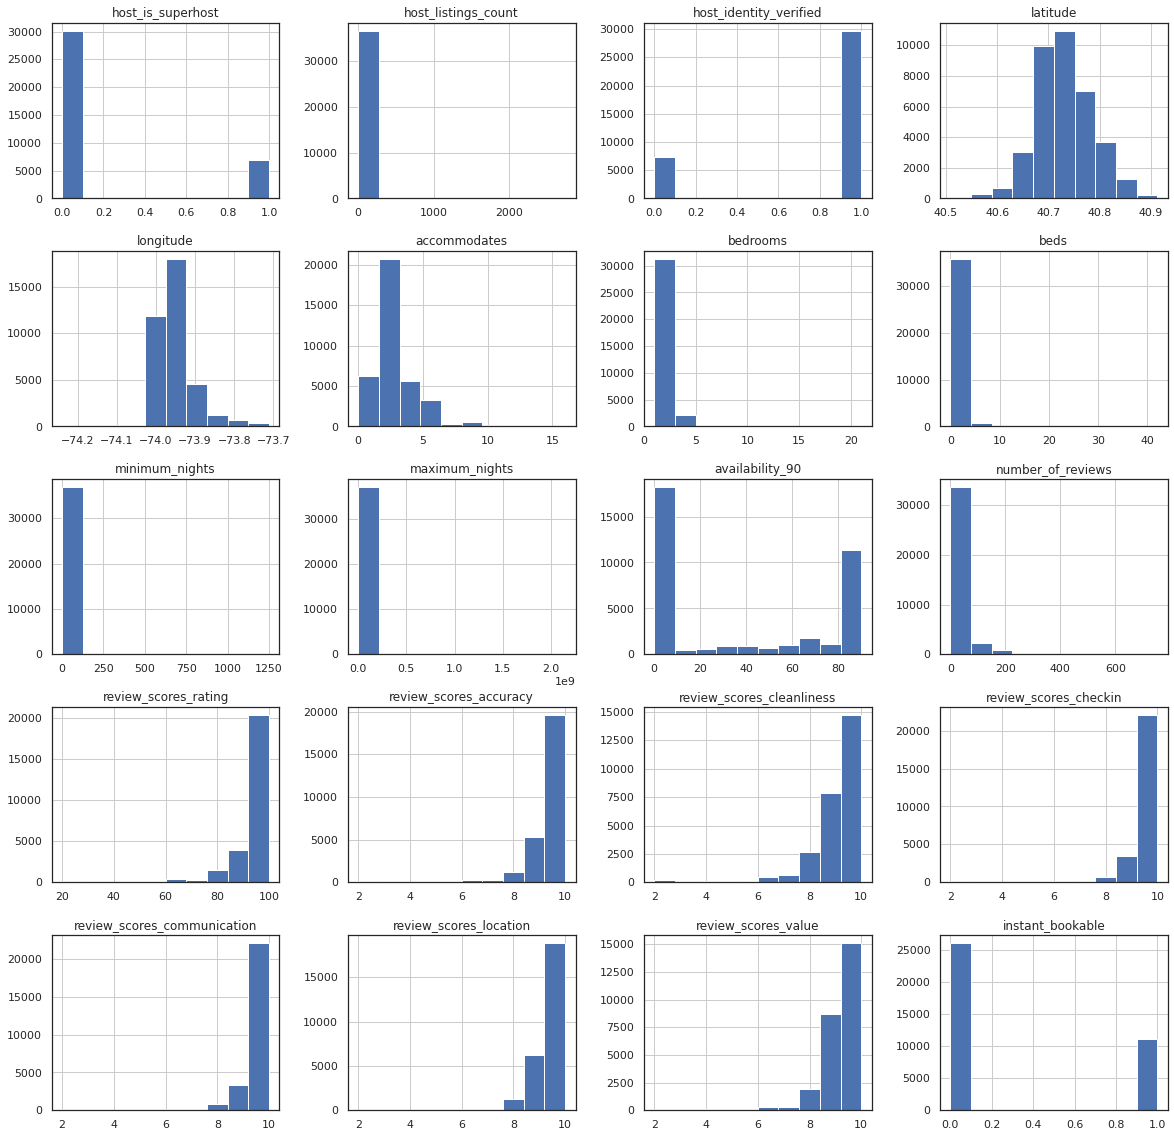

In [ ]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

Cleaning individual columns

In [ ]:
# host_since
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since) 

# Calculating the number of days
df['host_days_active'] = (datetime(2020, 12, 20) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 1900.0
Median days as host: 1963.0


In [ ]:
# host_response_time

print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

# Number of rows without a value for host_response_time which have also not yet had a review
print(len(df[df.loc[ :,['host_response_time', 'first_review'] ].isnull().sum(axis=1) == 2]))

Null values: 18507
Proportion: 50.0%
4748


In [ ]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

unknown               0.500027
within an hour        0.274046
within a few hours    0.106371
within a day          0.082109
a few days or more    0.037447
Name: host_response_time, dtype: float64

In [ ]:
# host_response_rate
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 18507
Proportion: 50.0%


In [ ]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

Mean host response rate: 89.0
Median host response rate: 100.0
Proportion of 100% host response rates: 64.1%


unknown    18507
100%       11869
50-89%      3069
90-99%      1874
0-49%       1693
Name: host_response_rate, dtype: int64

In [ ]:
# property_type
# Some cleaning of property types is required as there are a large number of categories with only a few listings. The categories 'apartment', 'house' and 'other' will be used, as most properties can be classified as either apartments or houses.
df.property_type.value_counts()

Entire apartment                      15506
Private room in apartment             12037
Private room in house                  1897
Private room in townhouse              1044
Entire condominium                      983
Entire house                            949
Entire loft                             628
Entire townhouse                        589
Shared room in apartment                501
Private room in condominium             477
Room in hotel                           371
Private room in loft                    351
Room in boutique hotel                  336
Entire serviced apartment               301
Entire guest suite                      231
Private room in guest suite             103
Shared room in house                     80
Private room in hostel                   52
Room in aparthotel                       51
Entire guesthouse                        45
Room in serviced apartment               43
Private room in serviced apartment       38
Shared room in loft             

In [ ]:
# Cleaning property_type
# three types: House, Apartment, and Hotel
df.property_type.replace({
    'Entire house': 'House',
    'Private room in house': 'House',
    'Entire townhouse': 'House',
    'Private room in townhouse': 'House',
    'Entire guesthouse': 'House',
    'Shared room in house': 'House',
    'Private room in guesthouse': 'House',
    'Tiny house': 'House',
    'Private room in tiny house': 'House',
    'Earth house': 'House',
    'Entire villa': 'House',
    'Private room in villa': 'House',
    'Private room in cottage': 'House',
    'Entire cottage': 'House',
    'Entire bungalow': 'House',
    'Private room in bungalow': 'House',
    'Shared room in bungalow': 'House',
    'Private room in farm stay': 'House',
    'Entire home/apt': 'House',
    
    'Entire apartment': 'Apartment',
    'Private room in apartment': 'Apartment',
    'Entire serviced apartment': 'Apartment',
    'Shared room in apartment': 'Apartment',
    'Room in serviced apartment': 'Apartment',
    'Private room in serviced apartment': 'Apartment',
    'Shared room in serviced apartment': 'Apartment',
    'Entire loft': 'Apartment',
    'Private room in loft': 'Apartment',
    'Shared room in loft': 'Apartment',
    'Entire condominium': 'Apartment',
    'Private room in condominium': 'Apartment',
    'Shared room in condominium': 'Apartment',
    'Entire apartment': 'Apartment', 
    'Private room in bed and breakfast': 'Apartment',
    'Private room in bed and breakfast': 'Apartment',
    
    'Room in boutique hotel': 'Hotel',
    'Room in hotel': 'Hotel',
    'Room in aparthotel': 'Hotel',
    'Room in hostel': 'Hotel',
    'Shared room in hostel': 'Hotel',
    'Private room in guest suite': 'Hotel',
    'Entire guest suite': 'Hotel'
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment','Hotel']), 'property_type'] = 'Other'

In [ ]:
df.room_type.value_counts()

Entire home/apt    19397
Private room       16630
Shared room          686
Hotel room           299
Name: room_type, dtype: int64

In [ ]:
df.property_type.isna().count()

37012

In [ ]:
# bathrooms, bedrooms and beds
for col in ['bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
# Amenities
df.amenities[:1].values

array(['["Refrigerator", "Air conditioning", "Baking sheet", "Free street parking", "Bathtub", "Kitchen", "Keypad", "Coffee maker", "Oven", "Iron", "Hangers", "Smoke alarm", "Dedicated workspace", "Fire extinguisher", "Hot water", "Long term stays allowed", "Extra pillows and blankets", "Hair dryer", "Bed linens", "Essentials", "Dishes and silverware", "TV", "Wifi", "Heating", "Paid parking off premises", "Cooking basics", "Stove", "Luggage dropoff allowed", "Cleaning before checkout", "Carbon monoxide alarm", "Ethernet connection"]'],
      dtype=object)

In [ ]:
# Creating a set of all possible amenities
amenities_list = list(df.amenities.values)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '1 space',
 '100\\ HDTV with Netflix',
 '120\\ HDTV with Amazon Prime Video',
 '120\\ HDTV with Apple TV',
 '12\\ TV',
 '1802 Beekman toiletries',
 '2 burner induction cooktop.  We provide pots and pans. induction stove',
 '2 spaces',
 '2-5 years old',
 '20\\ TV with standard cable',
 '24-hour fitness center',
 '24\\ HDTV with Chromecast',
 '30\\ HDTV',
 '32\\ HDTV',
 '32\\ HDTV with Amazon Prime Video',
 '32\\ HDTV with Chromecast',
 '32\\ HDTV with HBO Max',
 '32\\ HDTV with Netflix',
 '32\\ HDTV with Roku',
 '32\\ TV',
 '36\\ TV',
 '36\\ TV with Chromecast',
 '37\\ HDTV with Netflix',
 '37\\ TV with Amazon Prime Video',
 '39\\ HDTV',
 '40\\ HDTV',
 '40\\ HDTV with Apple TV',
 '40\\ HDTV with Chromecast',
 '40\\ HDTV with Netflix',
 '40\\ HDTV with Roku',
 '40\\ HDTV with standard cable',
 '40\\ TV with Netflix',
 '40\\ TV with premium cable',
 '42\\ HDTV with Amazon Prime Video',
 '42\\ HDTV with Netflix',
 '42\\ HDTV with premium cable',
 '42\\ TV',
 '43\\ HDTV',
 '43\\ HDTV 

In [ ]:
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [ ]:
df.iloc[:,29]

id
2595        4485.0
3831        4396.0
5121        4338.0
5178        4310.0
5203        4336.0
             ...  
48033101     634.0
48033611     487.0
48038944     418.0
48039640     418.0
48039776     418.0
Name: host_days_active, Length: 37012, dtype: float64

In [ ]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,29:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,29:].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['high_end_electronics', 'bbq', 'balcony', 'nature_and_views', 'breakfast', 'child_friendly', 'outdoor_space', 'hot_tub_sauna_or_pool', 'pets_allowed', 'secure', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable']


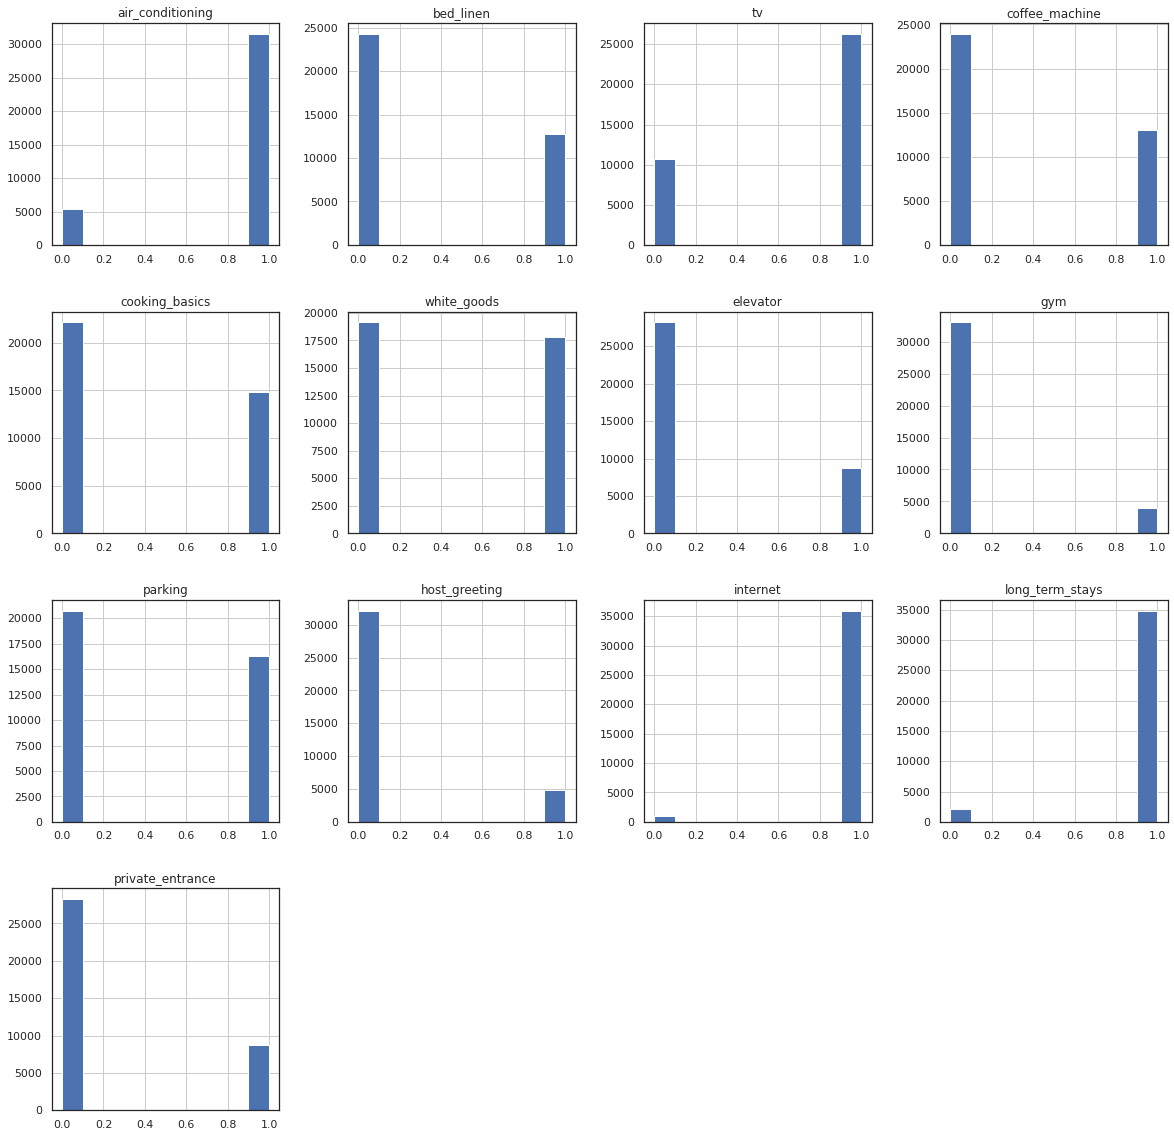

In [ ]:
# Amenities graph
df.iloc[:,29:].hist(figsize=(20,20));

In [ ]:
for col in df.iloc[:,29:].columns:
    print("Proportion without", col,":",round((len(df[df[col]==0])/len(df))*100,1),"%")

Proportion without air_conditioning : 14.6 %
Proportion without bed_linen : 65.7 %
Proportion without tv : 28.9 %
Proportion without coffee_machine : 64.7 %
Proportion without cooking_basics : 59.9 %
Proportion without white_goods : 51.8 %
Proportion without elevator : 76.3 %
Proportion without gym : 89.3 %
Proportion without parking : 56.1 %
Proportion without host_greeting : 86.9 %
Proportion without internet : 2.8 %
Proportion without long_term_stays : 5.9 %
Proportion without private_entrance : 76.4 %


In [ ]:
# price
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

In [ ]:
df.availability_90.describe()

count    37012.000000
mean        37.615557
std         39.905582
min          0.000000
25%          0.000000
50%         15.000000
75%         87.000000
max         90.000000
Name: availability_90, dtype: float64

Null values in 'first_review': 25.7%
Null values in 'review_scores_rating': 27.7%


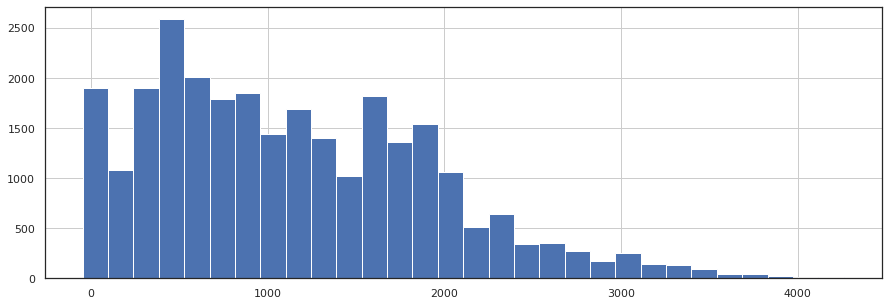

In [ ]:
# first_review and last_review

# About a quarter of listings have not had a review written for them. This is too large a proportion of the dataset to drop, and dropping the columns would lose a lot of useful information - reviews are very important in people's decisions to book, and therefore price.
# This is also too large a proportion of the dataset to simply replace with median/mean values, as this would skew the distribution substantially. Also, the missing values here are not really missing values, as the fact that they are NaNs is meaningful - it tells us that these are new or previously unbooked listings that have not had reviews yet. In order to make the resulting model work able to predict prices for any Airbnb listing, including brand new listings, is is actually beneficial to keep them in. Therefore, these will be kept as an 'unknown' category, and the feature will have to be treated as categorical (and therefore one-hot encoded) rather than numerical.

print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

df.first_review = pd.to_datetime(df.first_review) # Converting to datetime

# Calculating the number of days between the first review and the date the data was scraped
df['time_since_first_review'] = (datetime(2020, 12, 20) - df.first_review).astype('timedelta64[D]')

# Distribution of the number of days since first review
df.time_since_first_review.hist(figsize=(15,5), bins=30);

def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [ ]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

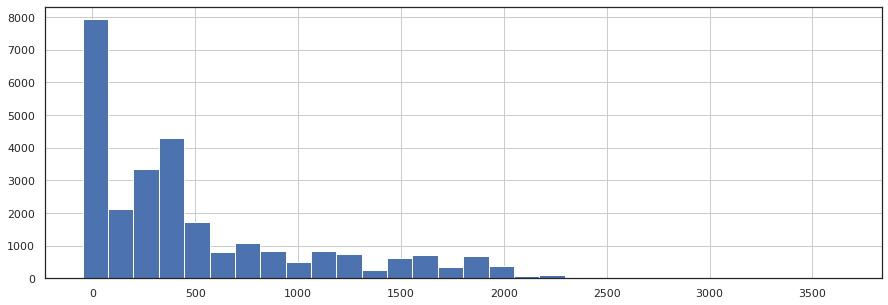

In [ ]:
# The same process will be followed for last_review:
df.last_review = pd.to_datetime(df.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
df['time_since_last_review'] = (datetime(2020, 12, 20) - df.last_review).astype('timedelta64[D]')

# Distribution of the number of days since last review
df.time_since_last_review.hist(figsize=(15,5), bins=30);

# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

# Dropping last_review - first_review will be kept for EDA and dropped later
df.drop('last_review', axis=1, inplace=True)

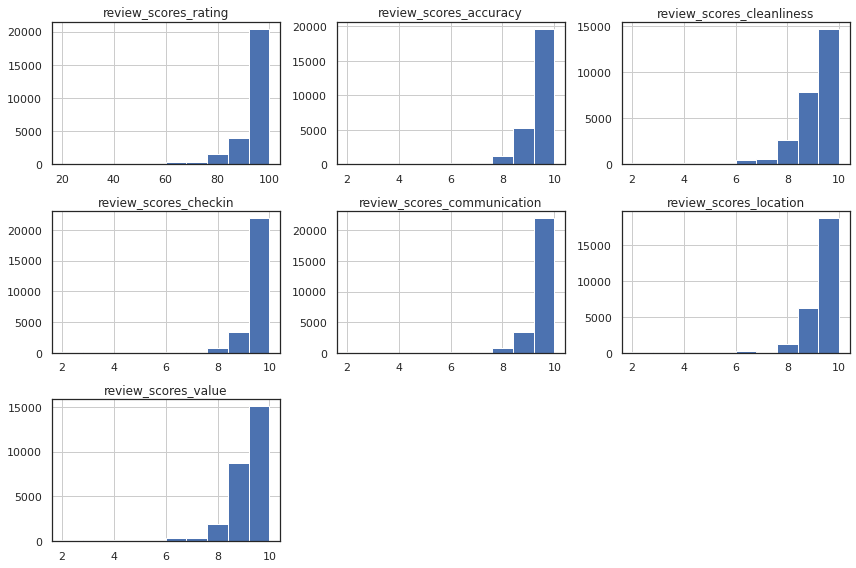

In [ ]:
# Review ratings columns

# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [ ]:
# Creating a list of all review columns that are scored out of 10
variables_to_plot.pop(0)
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 5, 8, 9, 10],
               labels=['0-5/10','8/10', '9/10', '10/10'],
               na_label='no reviews')
    
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 50, 80, 95, 100],
           labels=['0-49/100', '50-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

In [ ]:
df.head(3)

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days_active,air_conditioning,bed_linen,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,parking,host_greeting,internet,long_term_stays,private_entrance,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2595,2008-09-09,within a few hours,90-99%,0.0,6.0,1.0,40.75362,-73.98377,Apartment,Entire home/apt,2,1.0,1.0,100,30,1125,90,48,2009-11-21,80-94/100,9/10,9/10,10/10,10/10,10/10,9/10,0,4485.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4+ years,1+ year
3831,2008-12-07,within a few hours,90-99%,0.0,1.0,1.0,40.68514,-73.95976,Hotel,Entire home/apt,3,1.0,3.0,73,1,730,55,386,2014-09-30,80-94/100,10/10,9/10,9/10,10/10,10/10,10/10,0,4396.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4+ years,nan
5121,2009-02-03,unknown,unknown,0.0,1.0,1.0,40.68688,-73.95596,Apartment,Private room,2,1.0,1.0,60,30,730,90,50,2009-05-28,80-94/100,8/10,8/10,10/10,10/10,9/10,9/10,0,4338.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4+ years,1+ year


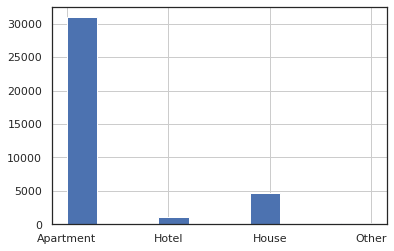

In [ ]:
# Property type graph
df.property_type.hist();

In [ ]:
df[df.isna().any(axis=1)]

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days_active,air_conditioning,bed_linen,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,parking,host_greeting,internet,long_term_stays,private_entrance,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6872,2009-05-07,unknown,unknown,0.0,0.0,1.0,40.80139,-73.94244,Apartment,Private room,1,1.0,1.0,65,30,180,90,0,NaT,nan,nan,nan,nan,nan,nan,nan,0,4245.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,nan,nan
7750,2009-05-20,unknown,unknown,0.0,2.0,1.0,40.79685,-73.94872,Apartment,Private room,1,2.0,2.0,96,30,365,89,0,NaT,nan,nan,nan,nan,nan,nan,nan,0,4232.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,nan,nan
11943,2009-10-12,unknown,unknown,0.0,1.0,0.0,40.63702,-73.96327,House,Private room,1,1.0,2.0,150,30,730,0,0,NaT,nan,nan,nan,nan,nan,nan,nan,0,4087.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,nan,nan
45935,2010-08-17,unknown,unknown,0.0,1.0,0.0,40.80640,-73.92395,Apartment,Private room,1,1.0,1.0,60,30,40,83,0,NaT,nan,nan,nan,nan,nan,nan,nan,0,3778.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,nan,nan
51438,2010-09-16,unknown,unknown,0.0,2.0,1.0,40.77333,-73.95199,Apartment,Private room,1,1.0,1.0,130,14,31,0,0,NaT,nan,nan,nan,nan,nan,nan,nan,0,3748.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48033101,2019-03-27,within an hour,100%,0.0,2.0,1.0,40.74415,-73.90941,Apartment,Entire home/apt,3,1.0,1.0,90,3,1125,90,0,NaT,nan,nan,nan,nan,nan,nan,nan,1,634.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,nan,nan
48033611,2019-08-21,unknown,unknown,0.0,1.0,1.0,40.87575,-73.88399,Apartment,Private room,1,1.0,0.0,520,1,365,72,0,NaT,nan,nan,nan,nan,nan,nan,nan,0,487.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,nan,nan
48038944,2019-10-29,within an hour,100%,0.0,1.0,1.0,40.75774,-73.96173,Apartment,Private room,1,1.0,1.0,63,30,90,1,0,NaT,nan,nan,nan,nan,nan,nan,nan,0,418.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,nan,nan


In [ ]:
df.fillna(value="unknown", inplace=True)

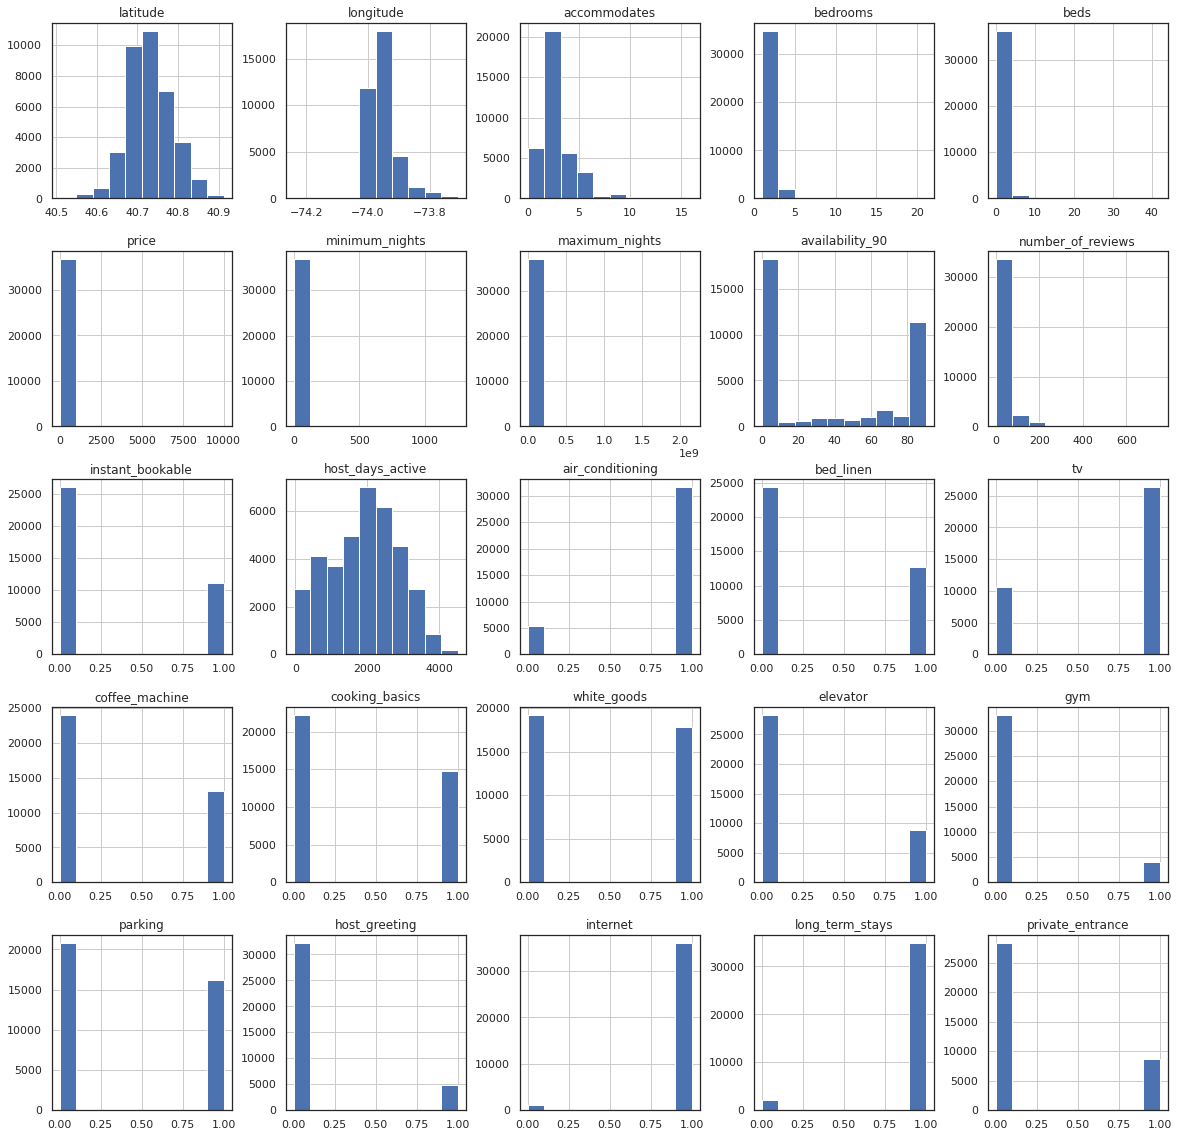

In [ ]:
df.hist(figsize=(20,20));

In [ ]:
# Drop host_since and first_review, we don't need these two anymore
df.drop(['host_since', 'first_review'], axis=1, inplace=True)

In [ ]:
# Convert catogorical data with one-hot encoding
transformed_df = pd.get_dummies(df)

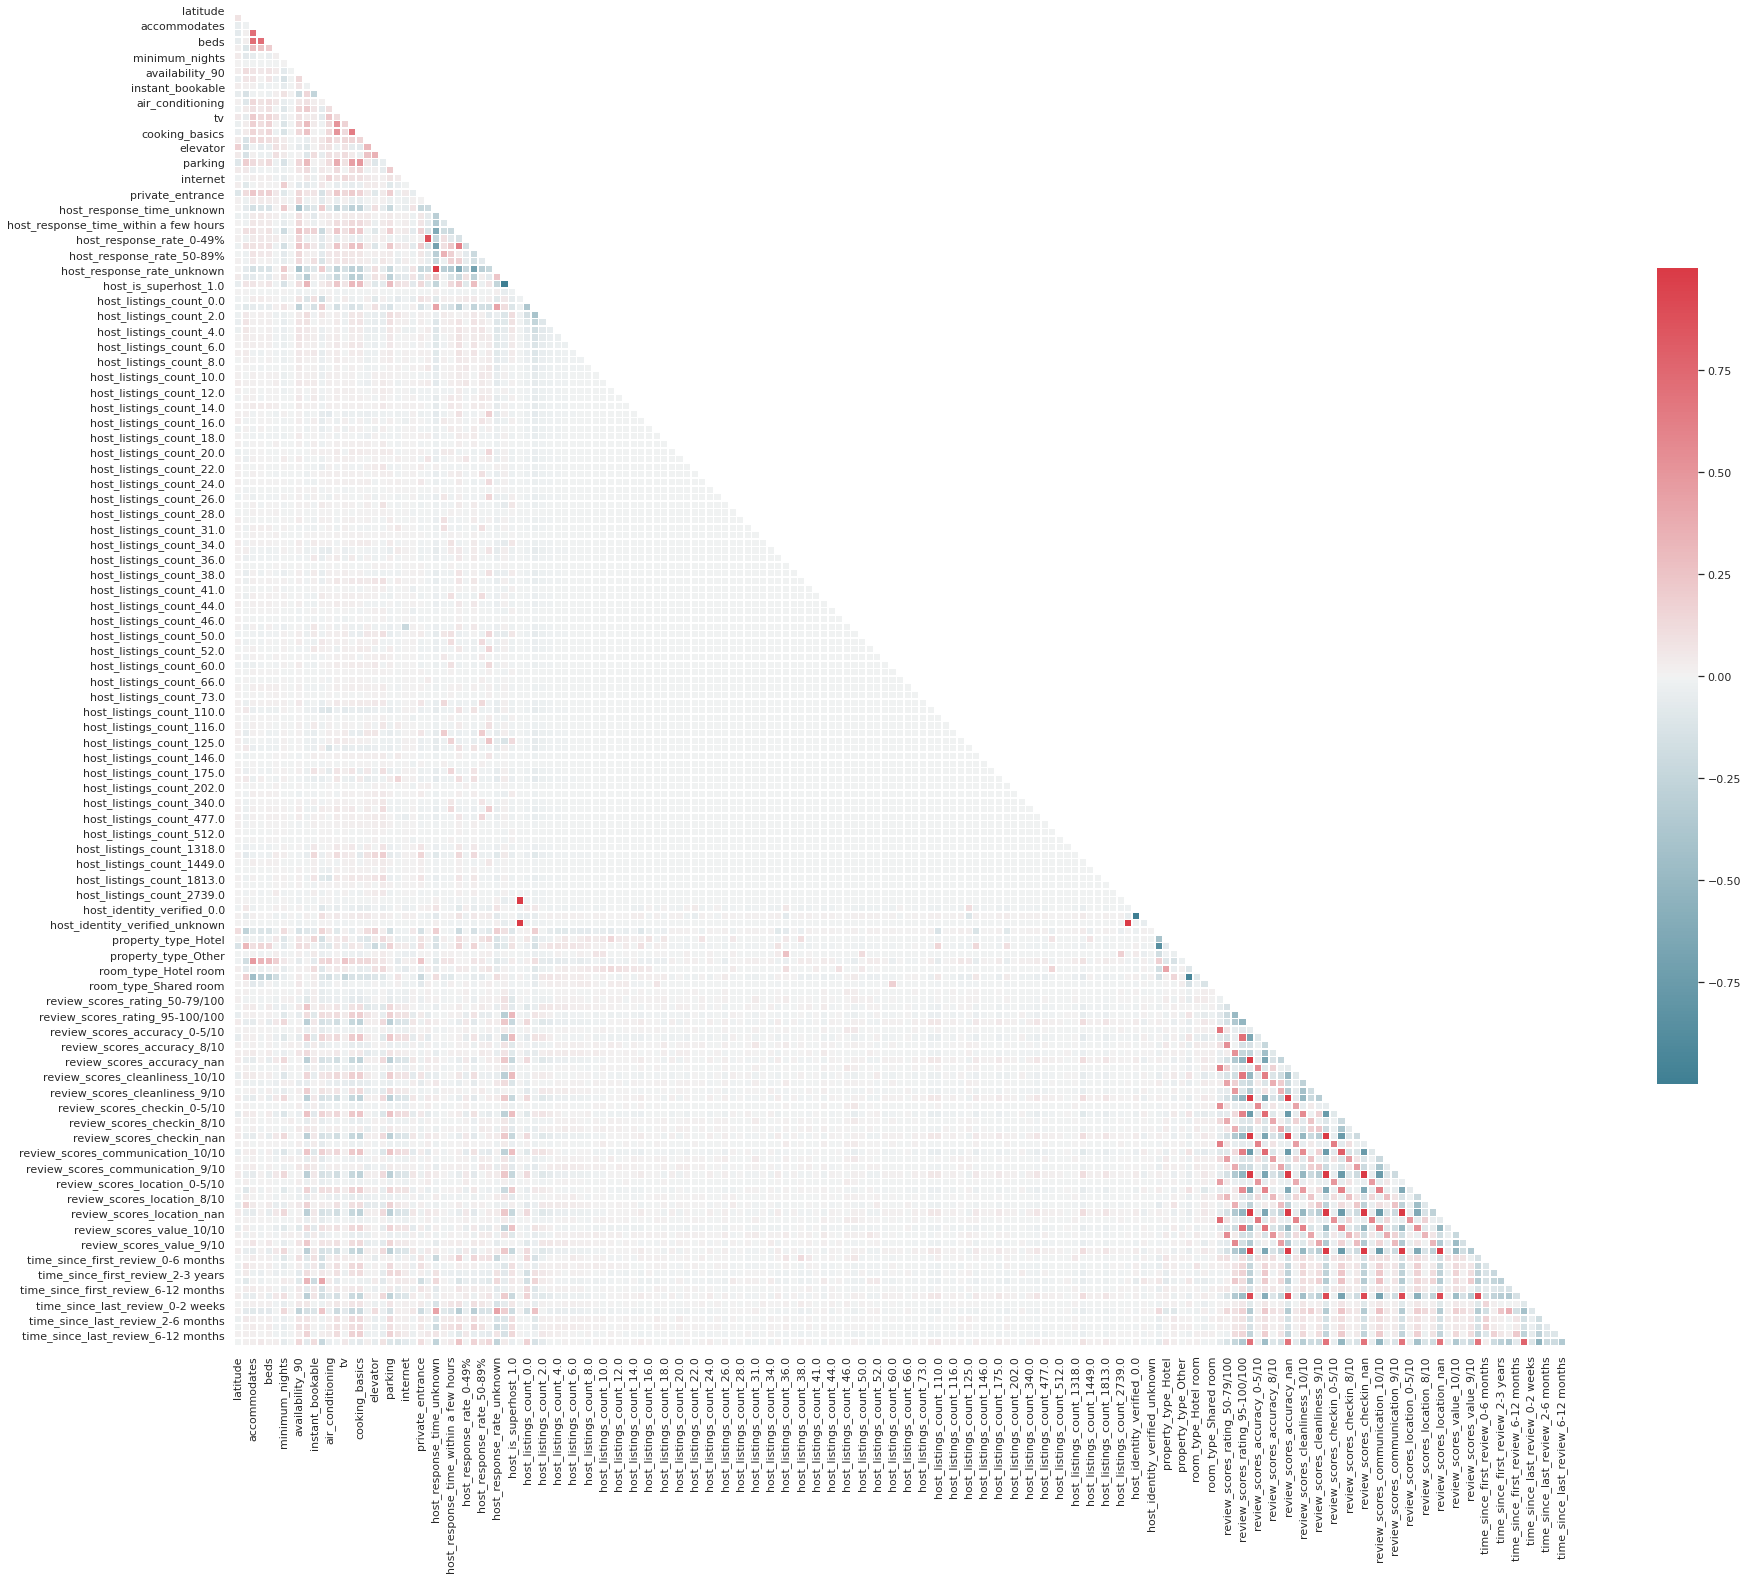

In [ ]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());
    
multi_collinearity_heatmap(transformed_df, figsize=(30,30))

In [ ]:
# Drop price outliers
transformed_df.drop(transformed_df[transformed_df.price>(transformed_df.price.mean()+3*transformed_df.price.std())].index,inplace=True)

# Drop prices that seems like per-person prices instead of one-nice price
transformed_df.drop(transformed_df[transformed_df.price/transformed_df.accommodates<12].index,inplace=True)

In [ ]:
transformed_df

,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,host_days_active,air_conditioning,bed_linen,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,parking,host_greeting,internet,long_term_stays,private_entrance,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_0-49%,host_response_rate_100%,host_response_rate_50-89%,host_response_rate_90-99%,host_response_rate_unknown,host_is_superhost_0.0,host_is_superhost_1.0,...,review_scores_cleanliness_0-5/10,review_scores_cleanliness_10/10,review_scores_cleanliness_8/10,review_scores_cleanliness_9/10,review_scores_cleanliness_nan,review_scores_checkin_0-5/10,review_scores_checkin_10/10,review_scores_checkin_8/10,review_scores_checkin_9/10,review_scores_checkin_nan,review_scores_communication_0-5/10,review_scores_communication_10/10,review_scores_communication_8/10,review_scores_communication_9/10,review_scores_communication_nan,review_scores_location_0-5/10,review_scores_location_10/10,review_scores_location_8/10,review_scores_location_9/10,review_scores_location_nan,review_scores_value_0-5/10,review_scores_value_10/10,review_scores_value_8/10,review_scores_value_9/10,review_scores_value_nan,time_since_first_review_0-6 months,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months,time_since_first_review_nan,time_since_last_review_0-2 weeks,time_since_last_review_1+ year,time_since_last_review_2-6 months,time_since_last_review_2-8 weeks,time_since_last_review_6-12 months,time_since_last_review_nan
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2595,40.75362,-73.98377,2,1.0,1.0,100,30,1125,90,48,0,4485.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
3831,40.68514,-73.95976,3,1.0,3.0,73,1,730,55,386,0,4396.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5121,40.68688,-73.95596,2,1.0,1.0,60,30,730,90,50,0,4338.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,1,0,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
5178,40.76468,-73.98315,2,1.0,1.0,79,2,14,86,474,0,4310.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
5203,40.80178,-73.96723,1,1.0,1.0,75,2,14,0,118,0,4336.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48033101,40.74415,-73.90941,3,1.0,1.0,90,3,1125,90,0,1,634.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0,0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
48033611,40.87575,-73.88399,1,1.0,0.0,520,1,365,72,0,0,487.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
48038944,40.75774,-73.96173,1,1.0,1.0,63,30,90,1,0,0,418.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
transformed_df.to_csv("newyork_cleaned.csv")

Standardising and normalising

In [ ]:
numerical_columns = ['accommodates', 'host_listings_count_1.0', 'latitude', 'longitude',
                     'bedrooms', 'beds', 'price', 'maximum_nights', 'minimum_nights', 
                     'number_of_reviews', 'availability_90','host_days_active']

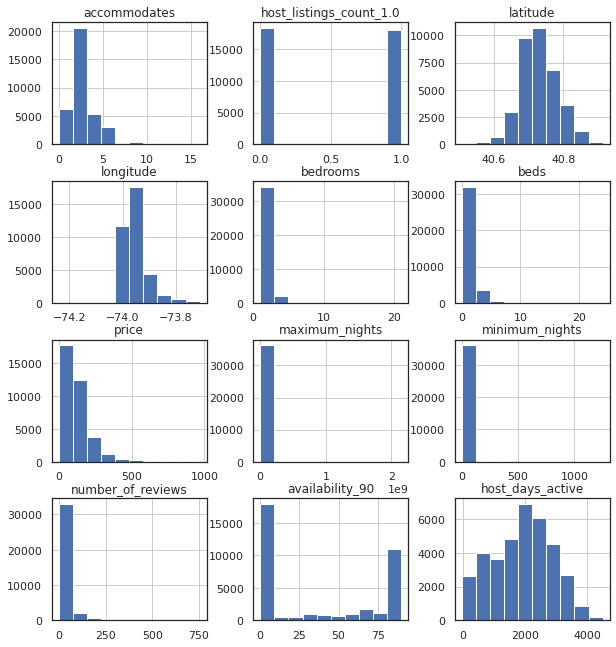

In [ ]:
transformed_df[numerical_columns].hist(figsize=(10,11));

In [ ]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['availability_90', 'host_days_active']] # Removing items not to be transformed

for col in numerical_columns:
    transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df[col] = np.log(np.abs(transformed_df[col]))

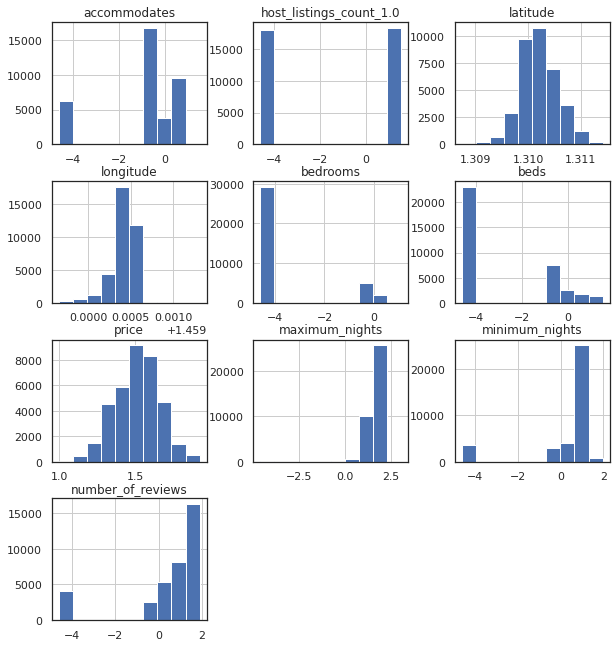

In [ ]:
transformed_df[numerical_columns].hist(figsize=(10,11));

In [ ]:
transformed_df.to_csv("newyork_cleaned2.csv")